In [5]:
import pandas as pd

# File paths
file_paths = {
    "TCN_model_search_lagged": "./code/metrics/Brazil/TCN_model_search_lagged_18-03-2025-12-22-20.csv",
    "TCN_new_model": "./code/metrics/Brazil/TCN_new_model_26-11-2024-00-40-59.csv",
    "TCN_new_model_search": "./code/metrics/Brazil/TCN_new_model_search_26-11-2024-00-27-43.csv",
}

# Load the CSV files
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

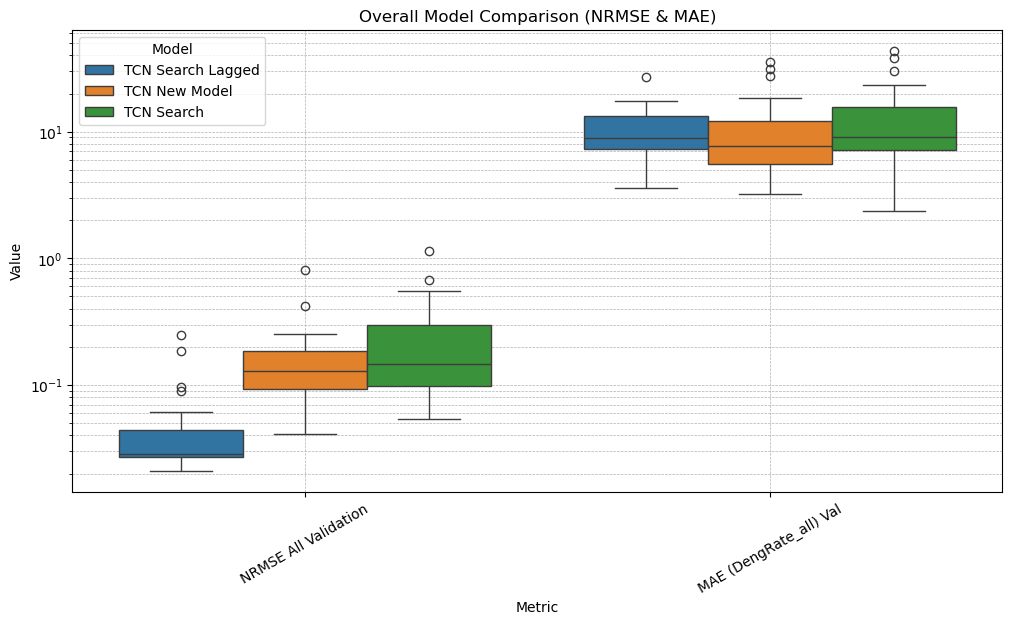

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename keys for readability
model_names = {
    "TCN_model_search_lagged": "TCN Search Lagged",
    "TCN_new_model": "TCN New Model",
    "TCN_new_model_search": "TCN Search",
}

# Prepare data for visualization
metric_cols = ["NRMSE All Validation", "MAE (DengRate_all) Val"]
merged_data = []

for model, df in dataframes.items():
    for metric in metric_cols:
        for _, row in df.iterrows():
            merged_data.append({
                "Model": model_names[model],
                "State": row["Department"],
                "Metric": metric,
                "Value": row[metric],
            })

# Convert to DataFrame
df_plot = pd.DataFrame(merged_data)

# Overall Comparison: Boxplots of Metrics Across Models
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x="Metric", y="Value", hue="Model")
plt.yscale("log")  # Log scale for better visibility
plt.title("Overall Model Comparison (NRMSE & MAE)")
plt.xticks(rotation=30)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


C:\Users\Gautam\AppData\Local\Temp\ipykernel_18204\3408420473.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x="State", y="Value", hue="Model", ci=None)


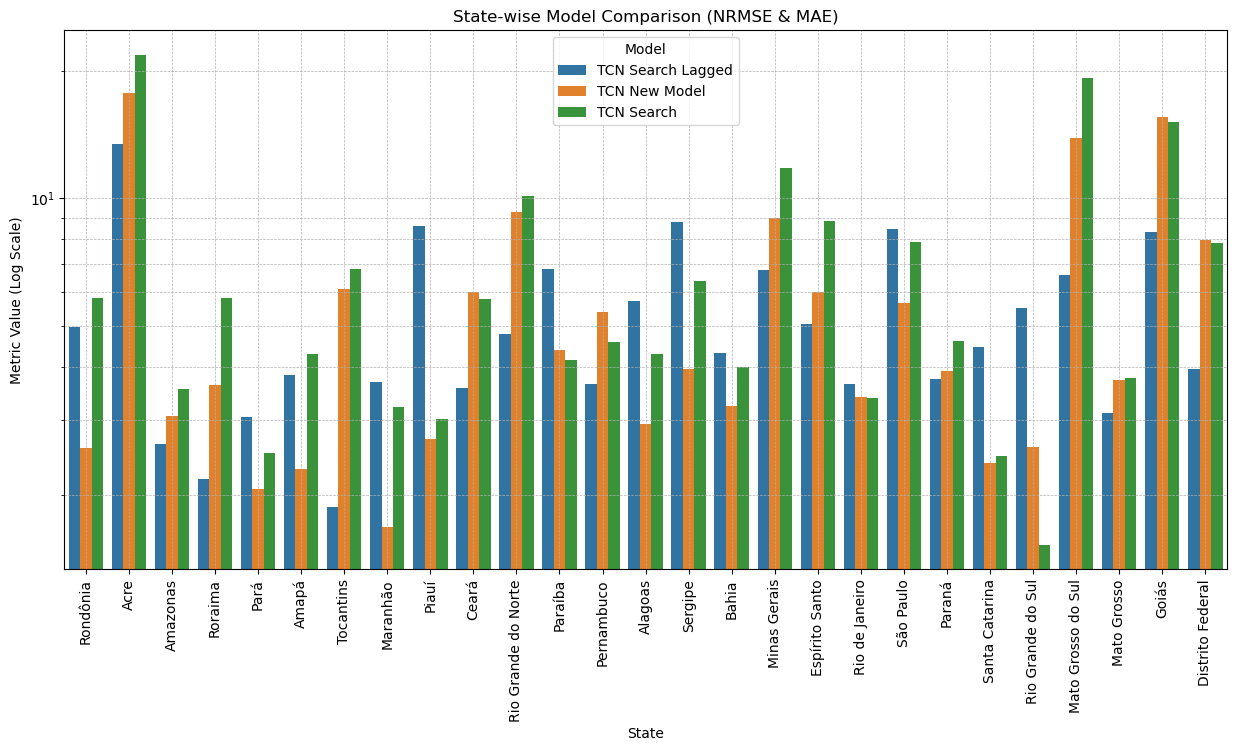

In [7]:
# Re-prepare the data for visualization
merged_data = []
for model, df in dataframes.items():
    for metric in metric_cols:
        for _, row in df.iterrows():
            merged_data.append({
                "Model": model_names[model],
                "State": row["Department"],
                "Metric": metric,
                "Value": row[metric],
            })

# Convert to DataFrame
df_plot = pd.DataFrame(merged_data)

# Single visualization for all states
plt.figure(figsize=(15, 7))
sns.barplot(data=df_plot, x="State", y="Value", hue="Model", ci=None)
plt.yscale("log")  # Log scale for better visibility
plt.xticks(rotation=90)
plt.title("State-wise Model Comparison (NRMSE & MAE)")
plt.xlabel("State")
plt.ylabel("Metric Value (Log Scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Model")
plt.show()


c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for th

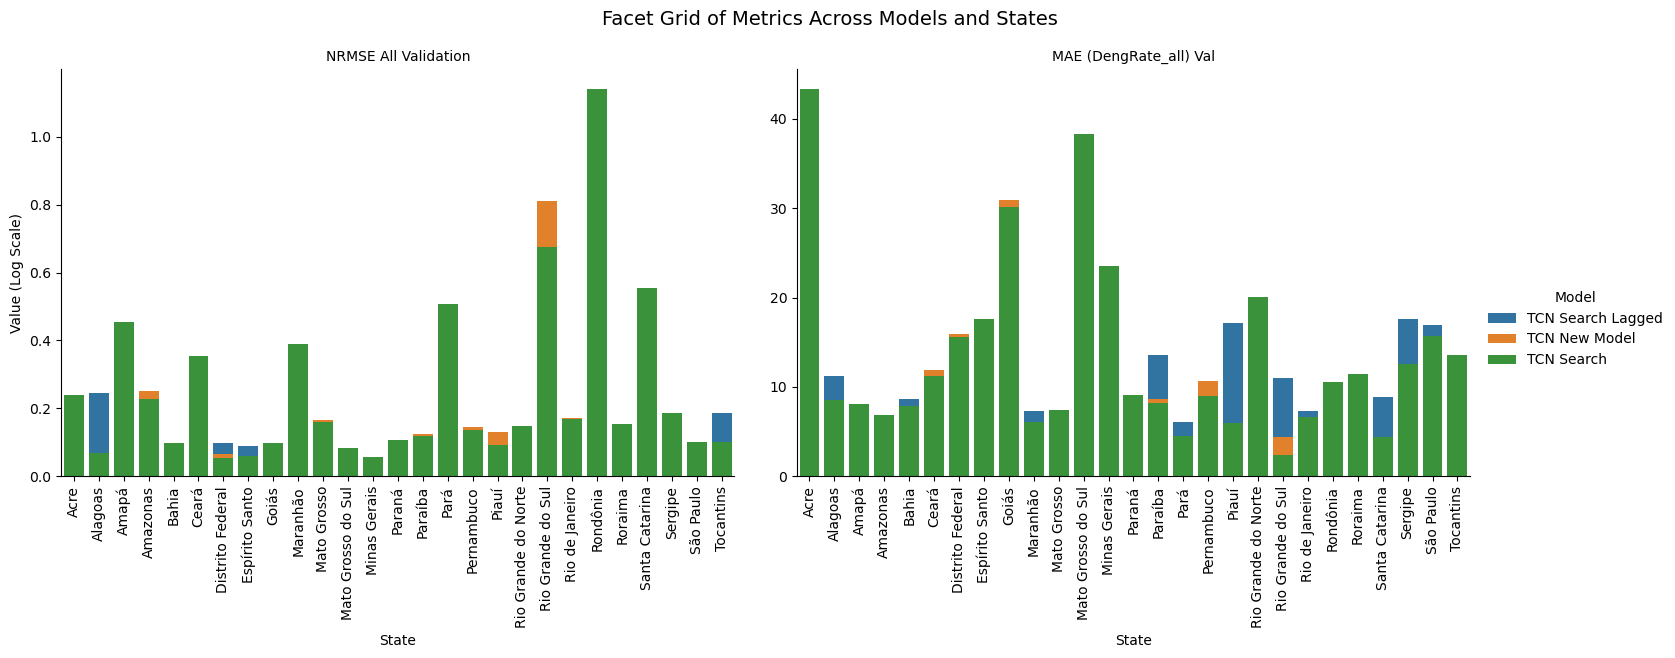

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# FacetGrid for small multiples
g = sns.FacetGrid(df_plot, col="Metric", hue="Model", sharey=False, height=5, aspect=1.5)
g.map(sns.barplot, "State", "Value", order=sorted(df_plot["State"].unique()), ci=None)
g.set_xticklabels(rotation=90)
g.set_ylabels("Value (Log Scale)")
g.set_titles(col_template="{col_name}")
g.add_legend()

plt.suptitle("Facet Grid of Metrics Across Models and States", y=1.05, fontsize=14)
plt.show()


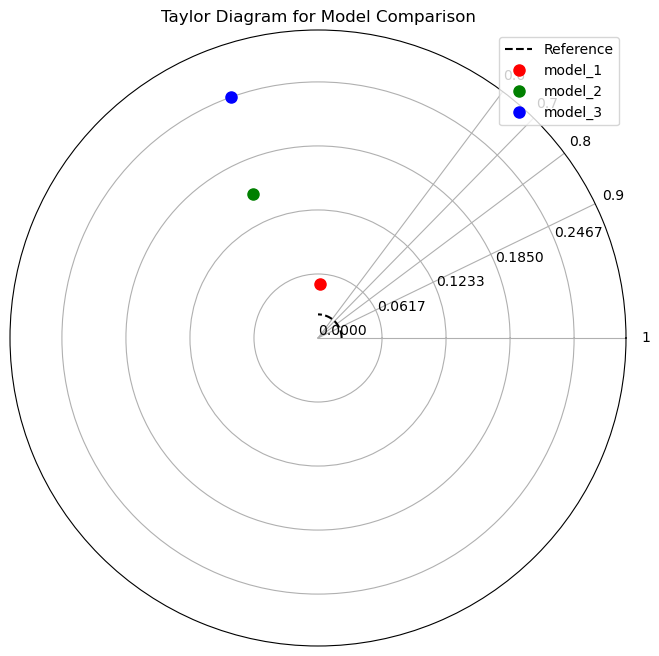

In [9]:
import pandas as pd
import numpy as np
import math

# Reload the datasets
file_paths = {
    "model_1": "./code/metrics/Brazil/TCN_model_search_lagged_18-03-2025-12-22-20.csv",
    "model_2": "./code/metrics/Brazil/TCN_new_model_26-11-2024-00-40-59.csv",
    "model_3": "./code/metrics/Brazil/TCN_new_model_search_26-11-2024-00-27-43.csv",
    "actual_data": "./google trends/merged_dataset.csv"
}

def plot_taylor_diagram(std_devs, correlations, ref_std, labels, colors):
    """ Generate a Taylor Diagram manually using Matplotlib """
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    # Convert correlation to angles (arccosine of correlation)
    angles = np.arccos(correlations)

    # Reference circle (actual standard deviation)
    theta = np.linspace(0, np.pi / 2, 100)
    ax.plot(theta, [ref_std] * 100, "k--", label="Reference")

    # Plot each model's performance
    for i, label in enumerate(labels):
        ax.plot(angles[i], std_devs[i], "o", label=label, color=colors[i], markersize=8)

    # Configure polar plot
    ax.set_xticks(np.arccos([1, 0.9, 0.8, 0.7, 0.6]))  # Correlation markers
    ax.set_xticklabels(["1", "0.9", "0.8", "0.7", "0.6"])
    ax.set_ylim(0, max(std_devs) + 0.05)
    ax.set_yticks(np.linspace(0, max(std_devs), 5))

    # Labels and title
    plt.legend(loc="upper right")
    plt.title("Taylor Diagram for Model Comparison")
    plt.show()

# Load data into a dictionary
datasets = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Mapping department IDs to names
DEP_NAMES = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro',
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

# Map department IDs to names
actual_data = datasets["actual_data"].copy()
actual_data["Department"] = actual_data["dep_id"].map(DEP_NAMES)

# Compute average dengue rates per department
actual_avg = actual_data.groupby("Department")[["DengRate_all", "DengRate_019"]].mean().reset_index()

# Merge actual averages with model metric datasets
merged_datasets = {}
for model_name, model_df in datasets.items():
    if model_name != "actual_data":
        merged_datasets[model_name] = model_df.merge(actual_avg, on="Department", how="left")

# Compute statistics for Taylor diagram
model_stats = {}
for model_name, df in merged_datasets.items():
    std_dev = df["NRMSE All Validation"].replace([np.inf, -np.inf], np.nan).dropna().std()
    correlation = np.corrcoef(df["NRMSE All Validation"].replace([np.inf, -np.inf], np.nan).dropna(),
                              df["DengRate_all"].dropna())[0, 1]
    model_stats[model_name] = {"std_dev": std_dev, "correlation": correlation}

# Convert to arrays for plotting
labels = list(model_stats.keys())
std_devs = np.array([model_stats[m]["std_dev"] for m in labels])
correlations = np.array([model_stats[m]["correlation"] for m in labels])
ref_std = actual_avg["DengRate_all"].std()  # Reference standard deviation

# Plot Taylor diagram
plot_taylor_diagram(std_devs, correlations, ref_std, labels, ["r", "g", "b"])


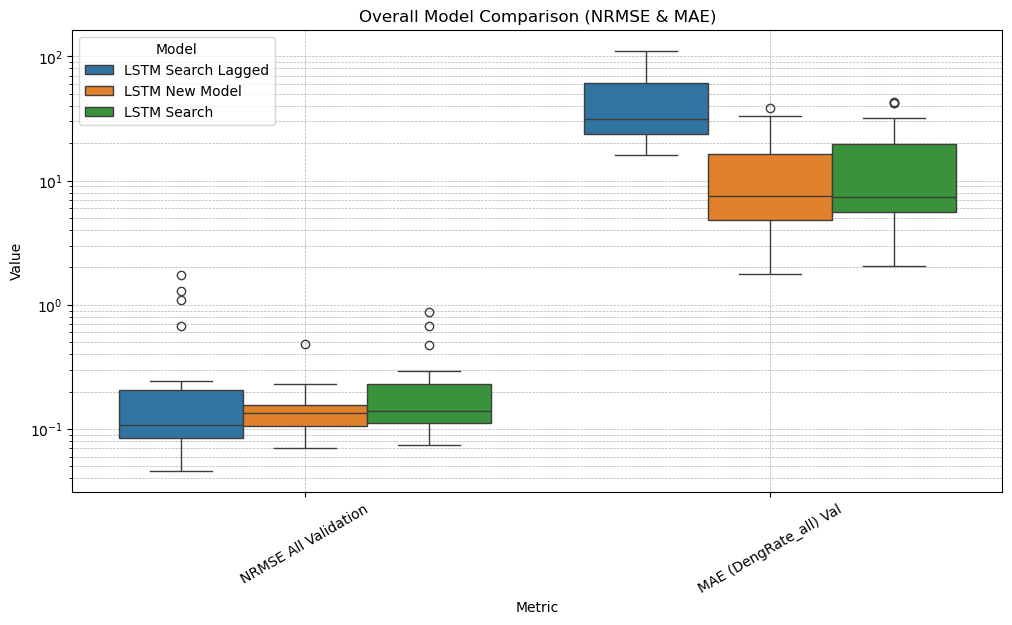

C:\Users\Gautam\AppData\Local\Temp\ipykernel_18872\2335266259.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x="State", y="Value", hue="Model", ci=None)


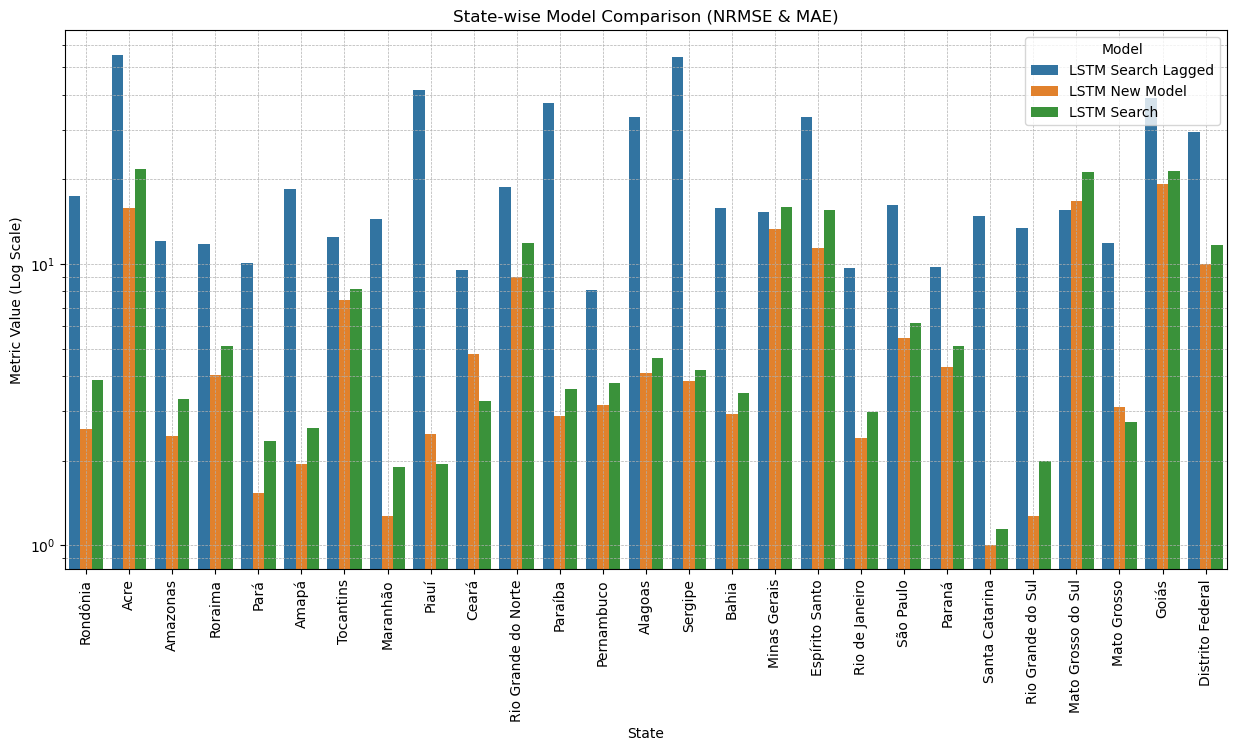

c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for th

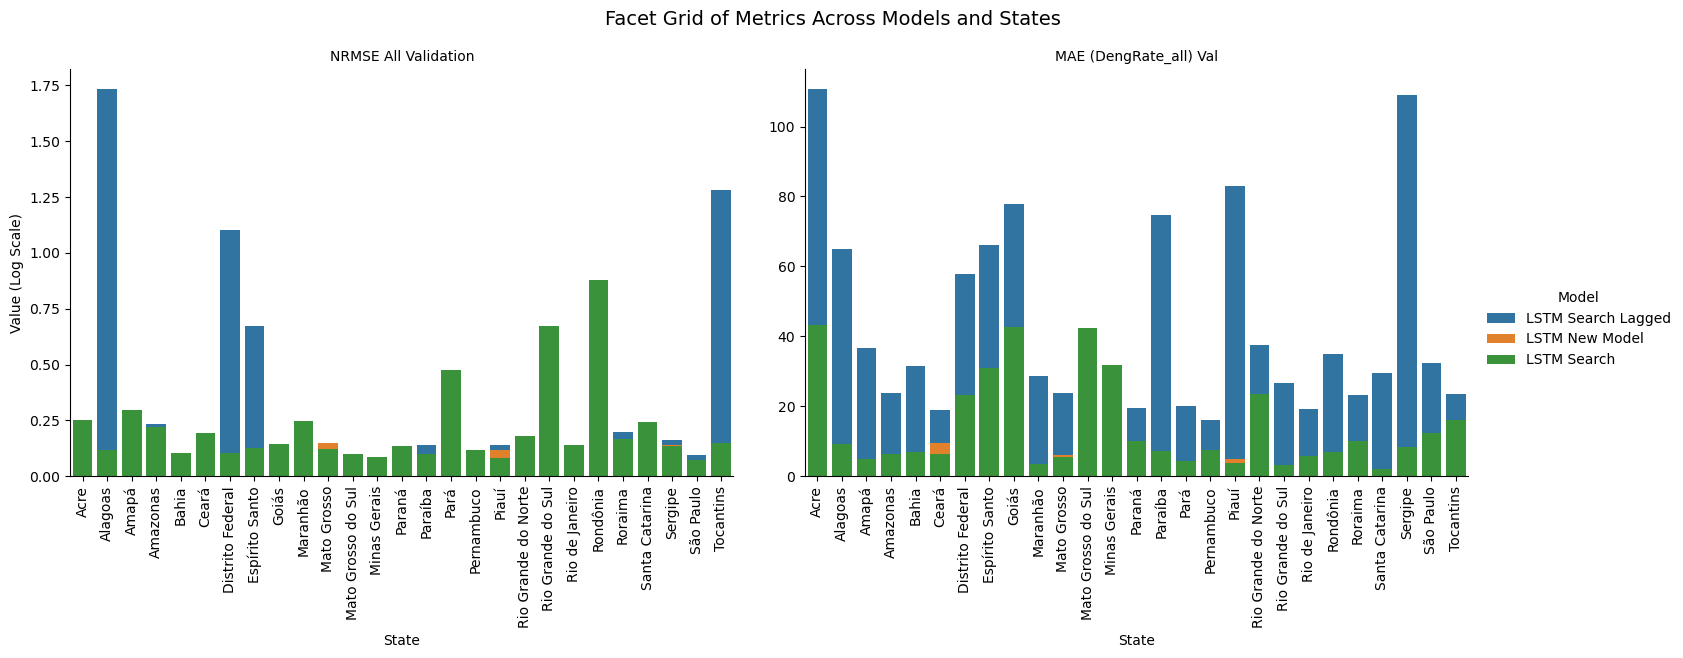

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
file_paths = {
    "LSTM_Model_search_lagged": "./code/metrics/Brazil/LSTM_Model_search_lagged_18-03-2025-20-16-03.csv",
    "LSTM_new_Model": "./code/metrics/Brazil/LSTM_Model_26-11-2024-00-46-12.csv",
    "LSTM_new_Model_search": "./code/metrics/Brazil/LSTM_Model_search_26-11-2024-00-44-37.csv",
}

# Load the CSV files
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}
# Rename keys for readability
model_names = {
    "LSTM_Model_search_lagged": "LSTM Search Lagged",
    "LSTM_new_Model": "LSTM New Model",
    "LSTM_new_Model_search": "LSTM Search",
}

# Prepare data for visualization
metric_cols = ["NRMSE All Validation", "MAE (DengRate_all) Val"]
merged_data = []

for model, df in dataframes.items():
    for metric in metric_cols:
        for _, row in df.iterrows():
            merged_data.append({
                "Model": model_names[model],
                "State": row["Department"],
                "Metric": metric,
                "Value": row[metric],
            })

# Convert to DataFrame
df_plot = pd.DataFrame(merged_data)

# Overall Comparison: Boxplots of Metrics Across Models
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x="Metric", y="Value", hue="Model")
plt.yscale("log")  # Log scale for better visibility
plt.title("Overall Model Comparison (NRMSE & MAE)")
plt.xticks(rotation=30)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Re-prepare the data for visualization
merged_data = []
for model, df in dataframes.items():
    for metric in metric_cols:
        for _, row in df.iterrows():
            merged_data.append({
                "Model": model_names[model],
                "State": row["Department"],
                "Metric": metric,
                "Value": row[metric],
            })

# Convert to DataFrame
df_plot = pd.DataFrame(merged_data)

# Single visualization for all states
plt.figure(figsize=(15, 7))
sns.barplot(data=df_plot, x="State", y="Value", hue="Model", ci=None)
plt.yscale("log")  # Log scale for better visibility
plt.xticks(rotation=90)
plt.title("State-wise Model Comparison (NRMSE & MAE)")
plt.xlabel("State")
plt.ylabel("Metric Value (Log Scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Model")
plt.show()

# FacetGrid for small multiples
g = sns.FacetGrid(df_plot, col="Metric", hue="Model", sharey=False, height=5, aspect=1.5)
g.map(sns.barplot, "State", "Value", order=sorted(df_plot["State"].unique()), ci=None)
g.set_xticklabels(rotation=90)
g.set_ylabels("Value (Log Scale)")
g.set_titles(col_template="{col_name}")
g.add_legend()

plt.suptitle("Facet Grid of Metrics Across Models and States", y=1.05, fontsize=14)
plt.show()

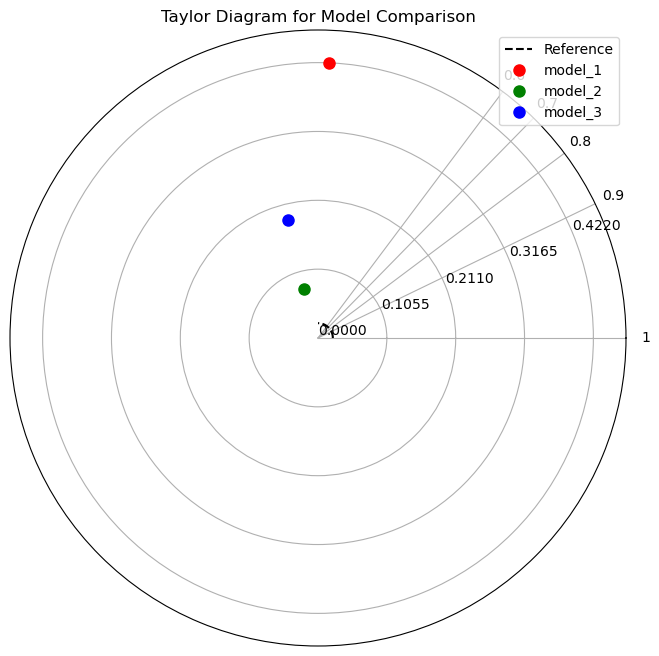

In [ ]:
import math

# Reload the datasets
file_paths = {
    "model_1": "./code/metrics/Brazil/LSTM_Model_search_lagged_18-03-2025-20-16-03.csv",
    "model_2": "./code/metrics/Brazil/LSTM_Model_26-11-2024-00-46-12.csv",
    "model_3": "./code/metrics/Brazil/LSTM_Model_search_26-11-2024-00-44-37.csv",
    "actual_data": "./google trends/merged_dataset.csv"
}

def plot_taylor_diagram(std_devs, correlations, ref_std, labels, colors):
    """ Generate a Taylor Diagram manually using Matplotlib """
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    # Convert correlation to angles (arccosine of correlation)
    angles = np.arccos(correlations)

    # Reference circle (actual standard deviation)
    theta = np.linspace(0, np.pi / 2, 100)
    ax.plot(theta, [ref_std] * 100, "k--", label="Reference")

    # Plot each model's performance
    for i, label in enumerate(labels):
        ax.plot(angles[i], std_devs[i], "o", label=label, color=colors[i], markersize=8)

    # Configure polar plot
    ax.set_xticks(np.arccos([1, 0.9, 0.8, 0.7, 0.6]))  # Correlation markers
    ax.set_xticklabels(["1", "0.9", "0.8", "0.7", "0.6"])
    ax.set_ylim(0, max(std_devs) + 0.05)
    ax.set_yticks(np.linspace(0, max(std_devs), 5))

    # Labels and title
    plt.legend(loc="upper right")
    plt.title("Taylor Diagram for Model Comparison")
    plt.show()

# Load data into a dictionary
datasets = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Mapping department IDs to names
DEP_NAMES = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro',
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

# Map department IDs to names
actual_data = datasets["actual_data"].copy()
actual_data["Department"] = actual_data["dep_id"].map(DEP_NAMES)

# Compute average dengue rates per department
actual_avg = actual_data.groupby("Department")[["DengRate_all", "DengRate_019"]].mean().reset_index()

# Merge actual averages with model metric datasets
merged_datasets = {}
for model_name, model_df in datasets.items():
    if model_name != "actual_data":
        merged_datasets[model_name] = model_df.merge(actual_avg, on="Department", how="left")

# Compute statistics for Taylor diagram
model_stats = {}
for model_name, df in merged_datasets.items():
    std_dev = df["NRMSE All Validation"].replace([np.inf, -np.inf], np.nan).dropna().std()
    correlation = np.corrcoef(df["NRMSE All Validation"].replace([np.inf, -np.inf], np.nan).dropna(),
                              df["DengRate_all"].dropna())[0, 1]
    model_stats[model_name] = {"std_dev": std_dev, "correlation": correlation}

# Convert to arrays for plotting
labels = list(model_stats.keys())
std_devs = np.array([model_stats[m]["std_dev"] for m in labels])
correlations = np.array([model_stats[m]["correlation"] for m in labels])
ref_std = actual_avg["DengRate_all"].std()  # Reference standard deviation

# Plot Taylor diagram
plot_taylor_diagram(std_devs, correlations, ref_std, labels, ["r", "g", "b"])


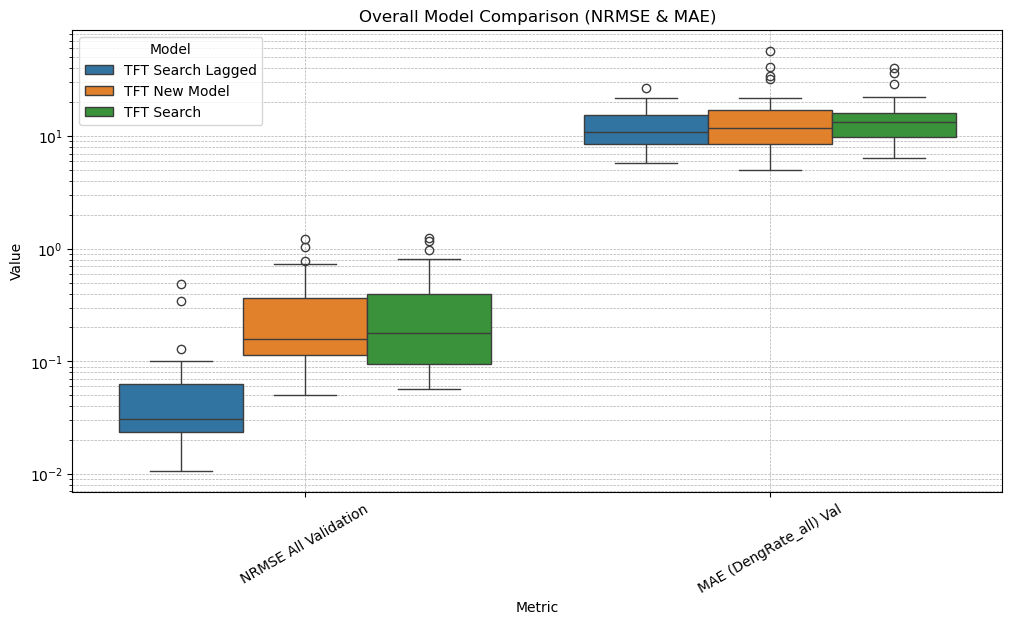

C:\Users\Gautam\AppData\Local\Temp\ipykernel_17852\3617133682.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x="State", y="Value", hue="Model", ci=None)


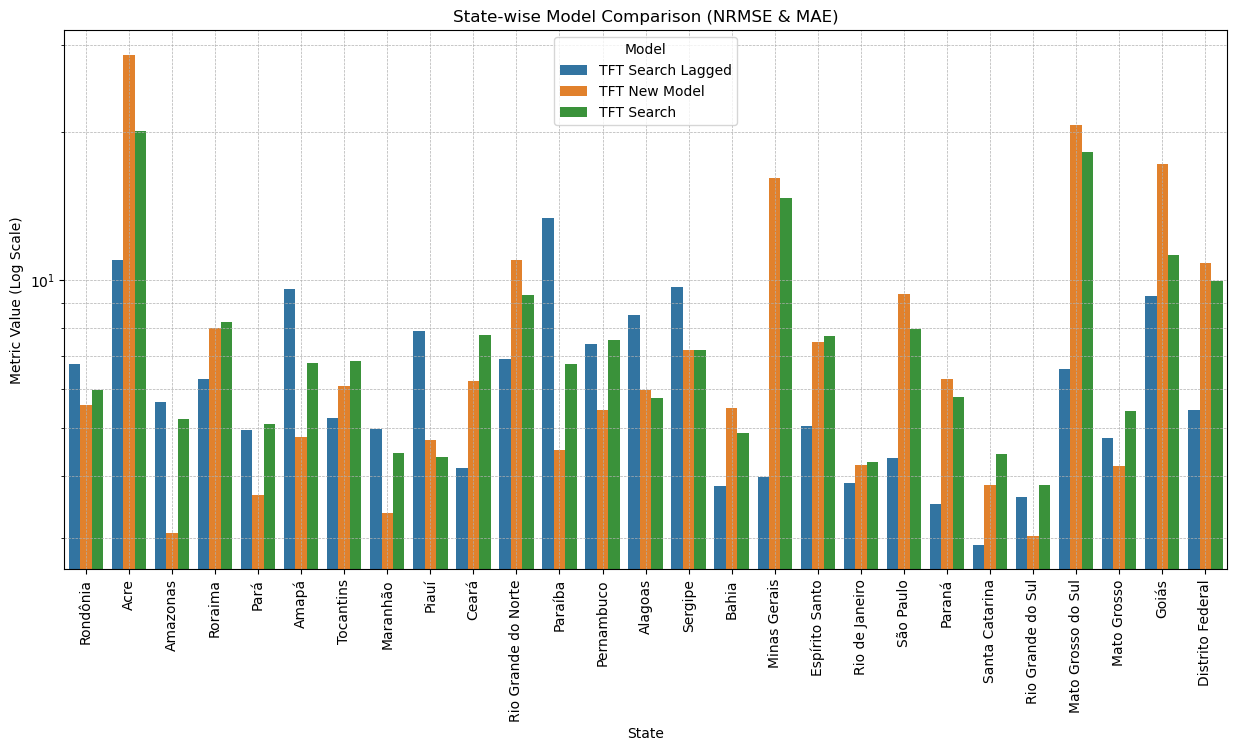

c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for th

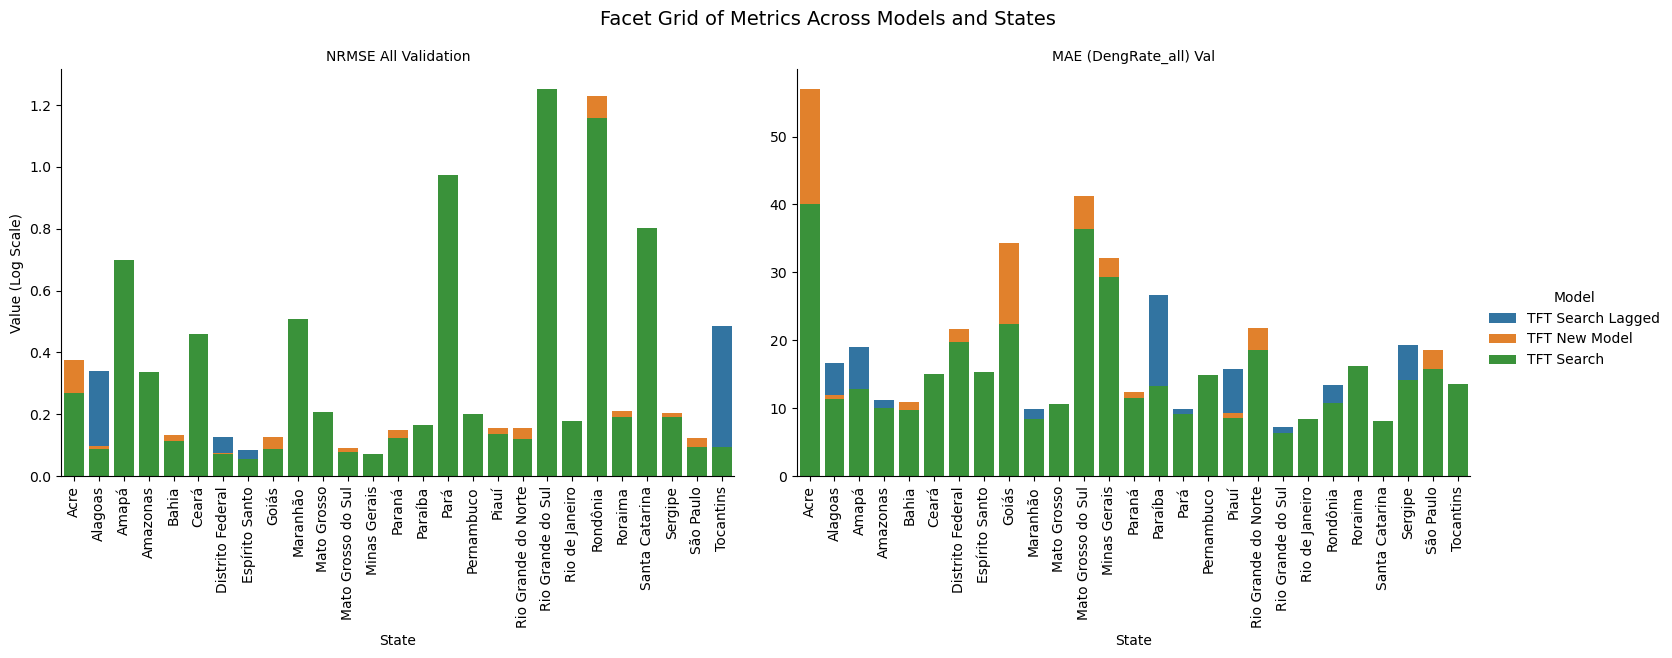

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_paths = {
    "TFT_Model_search_lagged": "./code/metrics/Brazil/TFT_model_lagged_18-03-2025-22-51-57.csv",
    "TFT_new_Model": "./code/metrics/Brazil/TFT_new_model_18-03-2025-23-03-37.csv",
    "TFT_new_Model_search": "./code/metrics/Brazil/TFT_model_search_18-03-2025-22-58-39.csv",
}

# Load the CSV files
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}
# Rename keys for readability
model_names = {
    "TFT_Model_search_lagged": "TFT Search Lagged",
    "TFT_new_Model": "TFT New Model",
    "TFT_new_Model_search": "TFT Search",
}

# Prepare data for visualization
metric_cols = ["NRMSE All Validation", "MAE (DengRate_all) Val"]
merged_data = []

for model, df in dataframes.items():
    for metric in metric_cols:
        for _, row in df.iterrows():
            merged_data.append({
                "Model": model_names[model],
                "State": row["Department"],
                "Metric": metric,
                "Value": row[metric],
            })

# Convert to DataFrame
df_plot = pd.DataFrame(merged_data)

# Overall Comparison: Boxplots of Metrics Across Models
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x="Metric", y="Value", hue="Model")
plt.yscale("log")  # Log scale for better visibility
plt.title("Overall Model Comparison (NRMSE & MAE)")
plt.xticks(rotation=30)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Re-prepare the data for visualization
merged_data = []
for model, df in dataframes.items():
    for metric in metric_cols:
        for _, row in df.iterrows():
            merged_data.append({
                "Model": model_names[model],
                "State": row["Department"],
                "Metric": metric,
                "Value": row[metric],
            })

# Convert to DataFrame
df_plot = pd.DataFrame(merged_data)

# Single visualization for all states
plt.figure(figsize=(15, 7))
sns.barplot(data=df_plot, x="State", y="Value", hue="Model", ci=None)
plt.yscale("log")  # Log scale for better visibility
plt.xticks(rotation=90)
plt.title("State-wise Model Comparison (NRMSE & MAE)")
plt.xlabel("State")
plt.ylabel("Metric Value (Log Scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Model")
plt.show()

# FacetGrid for small multiples
g = sns.FacetGrid(df_plot, col="Metric", hue="Model", sharey=False, height=5, aspect=1.5)
g.map(sns.barplot, "State", "Value", order=sorted(df_plot["State"].unique()), ci=None)
g.set_xticklabels(rotation=90)
g.set_ylabels("Value (Log Scale)")
g.set_titles(col_template="{col_name}")
g.add_legend()

plt.suptitle("Facet Grid of Metrics Across Models and States", y=1.05, fontsize=14)
plt.show()

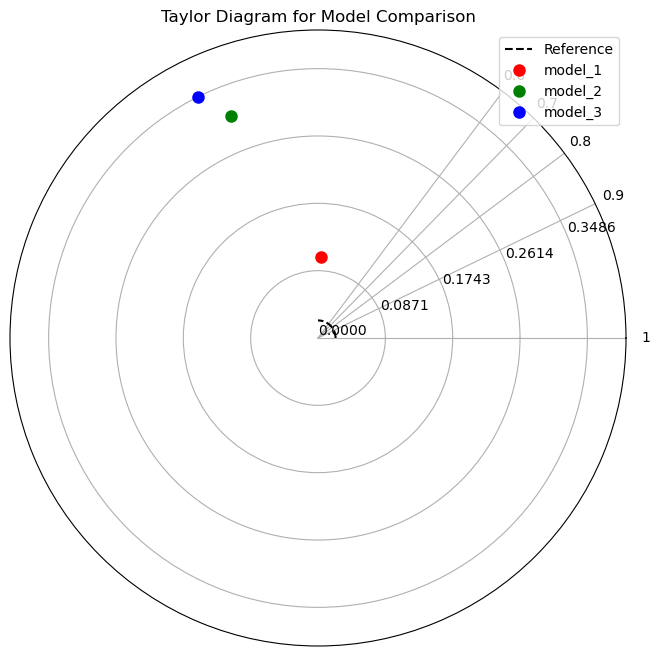

In [2]:
import math

# Reload the datasets
file_paths = {
    "model_1": "./code/metrics/Brazil/TFT_model_lagged_18-03-2025-22-51-57.csv",
    "model_2": "./code/metrics/Brazil/TFT_new_model_18-03-2025-23-03-37.csv",
    "model_3": "./code/metrics/Brazil/TFT_model_search_18-03-2025-22-58-39.csv",
    "actual_data": "./google trends/merged_dataset.csv"
}

def plot_taylor_diagram(std_devs, correlations, ref_std, labels, colors):
    """ Generate a Taylor Diagram manually using Matplotlib """
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    # Convert correlation to angles (arccosine of correlation)
    angles = np.arccos(correlations)

    # Reference circle (actual standard deviation)
    theta = np.linspace(0, np.pi / 2, 100)
    ax.plot(theta, [ref_std] * 100, "k--", label="Reference")

    # Plot each model's performance
    for i, label in enumerate(labels):
        ax.plot(angles[i], std_devs[i], "o", label=label, color=colors[i], markersize=8)

    # Configure polar plot
    ax.set_xticks(np.arccos([1, 0.9, 0.8, 0.7, 0.6]))  # Correlation markers
    ax.set_xticklabels(["1", "0.9", "0.8", "0.7", "0.6"])
    ax.set_ylim(0, max(std_devs) + 0.05)
    ax.set_yticks(np.linspace(0, max(std_devs), 5))

    # Labels and title
    plt.legend(loc="upper right")
    plt.title("Taylor Diagram for Model Comparison")
    plt.show()

# Load data into a dictionary
datasets = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Mapping department IDs to names
DEP_NAMES = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro',
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

# Map department IDs to names
actual_data = datasets["actual_data"].copy()
actual_data["Department"] = actual_data["dep_id"].map(DEP_NAMES)

# Compute average dengue rates per department
actual_avg = actual_data.groupby("Department")[["DengRate_all", "DengRate_019"]].mean().reset_index()

# Merge actual averages with model metric datasets
merged_datasets = {}
for model_name, model_df in datasets.items():
    if model_name != "actual_data":
        merged_datasets[model_name] = model_df.merge(actual_avg, on="Department", how="left")

# Compute statistics for Taylor diagram
model_stats = {}
for model_name, df in merged_datasets.items():
    std_dev = df["NRMSE All Validation"].replace([np.inf, -np.inf], np.nan).dropna().std()
    correlation = np.corrcoef(df["NRMSE All Validation"].replace([np.inf, -np.inf], np.nan).dropna(),
                              df["DengRate_all"].dropna())[0, 1]
    model_stats[model_name] = {"std_dev": std_dev, "correlation": correlation}

# Convert to arrays for plotting
labels = list(model_stats.keys())
std_devs = np.array([model_stats[m]["std_dev"] for m in labels])
correlations = np.array([model_stats[m]["correlation"] for m in labels])
ref_std = actual_avg["DengRate_all"].std()  # Reference standard deviation

# Plot Taylor diagram
plot_taylor_diagram(std_devs, correlations, ref_std, labels, ["r", "g", "b"])


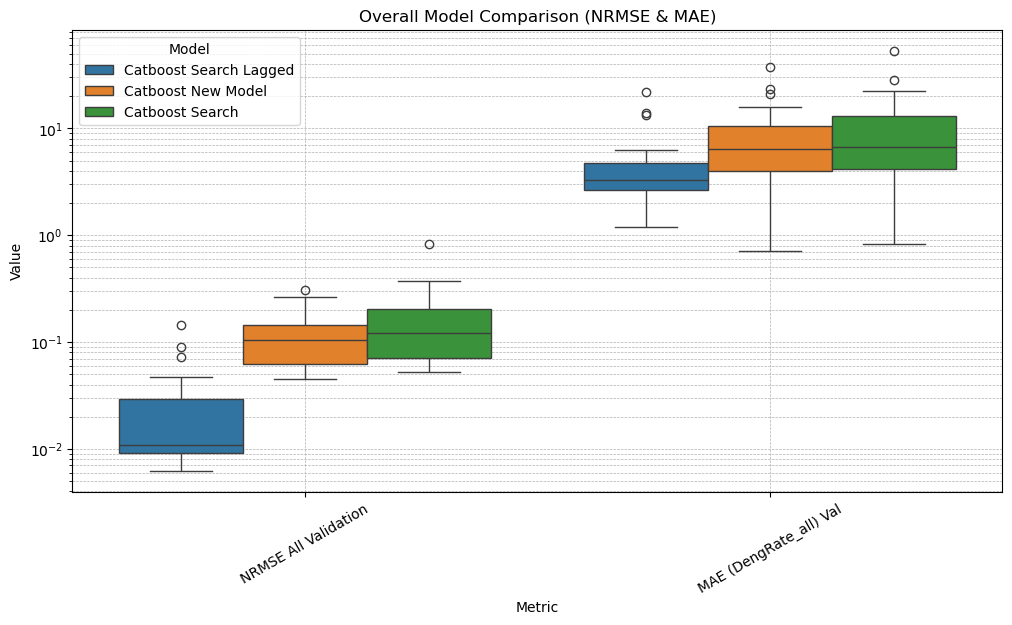

C:\Users\Gautam\AppData\Local\Temp\ipykernel_17852\2233535372.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x="State", y="Value", hue="Model", ci=None)


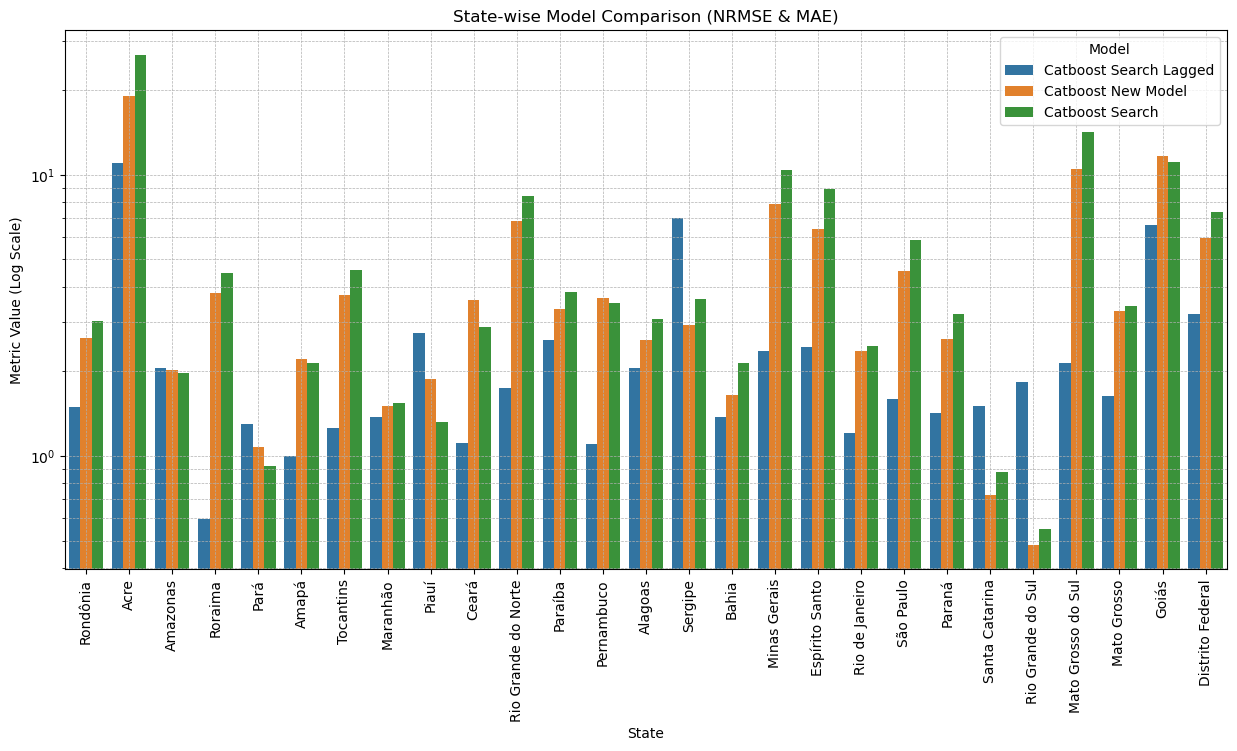

c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Gautam\anaconda3\envs\minornew\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for th

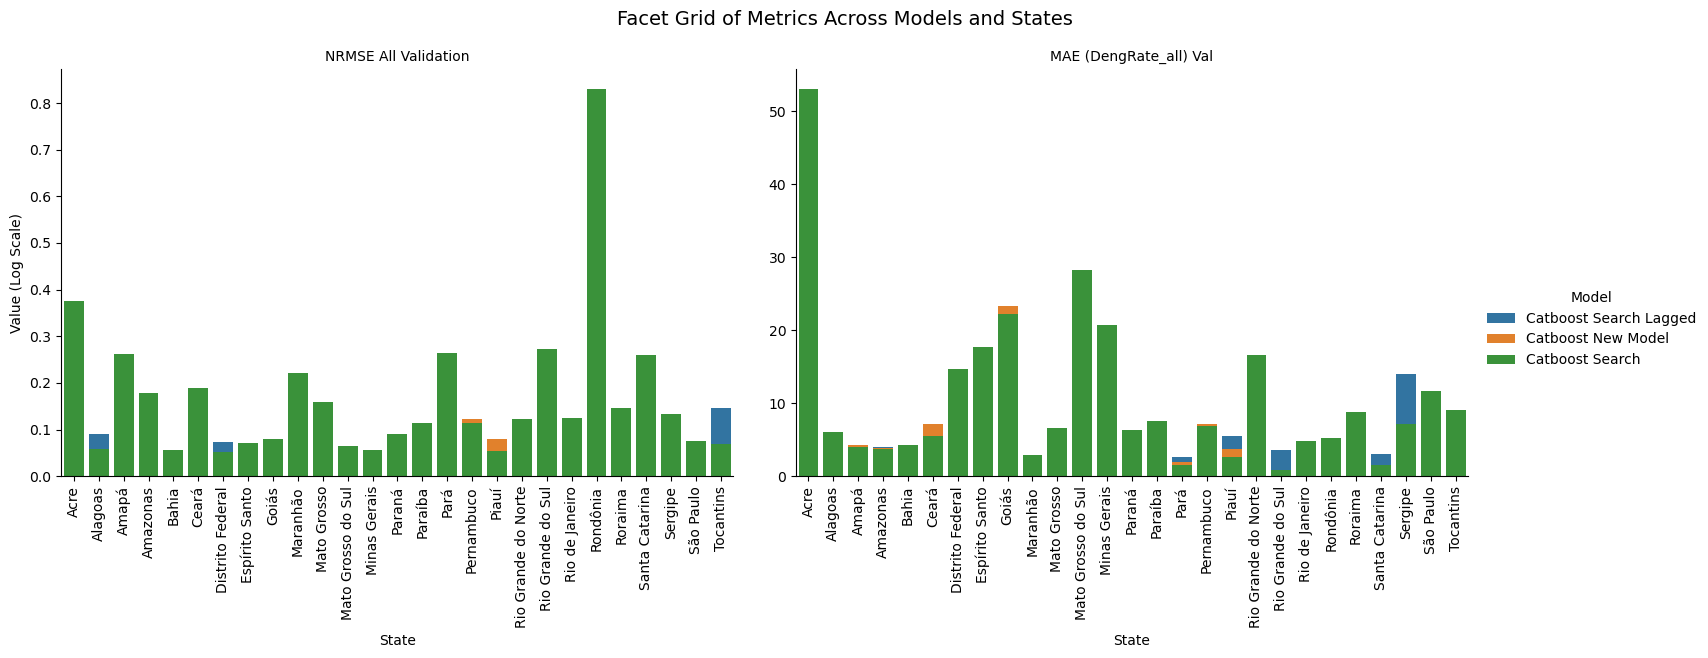

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_paths = {
    "Catboost_Model_search_lagged": "./code/metrics/Brazil/catboost_lagged_19-03-2025-00-47-00.csv",
    "Catboost_new_Model": "./code/metrics/Brazil/catboost_normal26-11-2024-01-03-19.csv",
    "Catboost_new_Model_search": "./code/metrics/Brazil/catboost_search_26-11-2024-02-20-15.csv",
}

# Load the CSV files
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}
# Rename keys for readability
model_names = {
    "Catboost_Model_search_lagged": "Catboost Search Lagged",
    "Catboost_new_Model": "Catboost New Model",
    "Catboost_new_Model_search": "Catboost Search",
}

# Prepare data for visualization
metric_cols = ["NRMSE All Validation", "MAE (DengRate_all) Val"]
merged_data = []

for model, df in dataframes.items():
    for metric in metric_cols:
        for _, row in df.iterrows():
            merged_data.append({
                "Model": model_names[model],
                "State": row["Department"],
                "Metric": metric,
                "Value": row[metric],
            })

# Convert to DataFrame
df_plot = pd.DataFrame(merged_data)

# Overall Comparison: Boxplots of Metrics Across Models
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x="Metric", y="Value", hue="Model")
plt.yscale("log")  # Log scale for better visibility
plt.title("Overall Model Comparison (NRMSE & MAE)")
plt.xticks(rotation=30)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Re-prepare the data for visualization
merged_data = []
for model, df in dataframes.items():
    for metric in metric_cols:
        for _, row in df.iterrows():
            merged_data.append({
                "Model": model_names[model],
                "State": row["Department"],
                "Metric": metric,
                "Value": row[metric],
            })

# Convert to DataFrame
df_plot = pd.DataFrame(merged_data)

# Single visualization for all states
plt.figure(figsize=(15, 7))
sns.barplot(data=df_plot, x="State", y="Value", hue="Model", ci=None)
plt.yscale("log")  # Log scale for better visibility
plt.xticks(rotation=90)
plt.title("State-wise Model Comparison (NRMSE & MAE)")
plt.xlabel("State")
plt.ylabel("Metric Value (Log Scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Model")
plt.show()

# FacetGrid for small multiples
g = sns.FacetGrid(df_plot, col="Metric", hue="Model", sharey=False, height=5, aspect=1.5)
g.map(sns.barplot, "State", "Value", order=sorted(df_plot["State"].unique()), ci=None)
g.set_xticklabels(rotation=90)
g.set_ylabels("Value (Log Scale)")
g.set_titles(col_template="{col_name}")
g.add_legend()

plt.suptitle("Facet Grid of Metrics Across Models and States", y=1.05, fontsize=14)
plt.show()

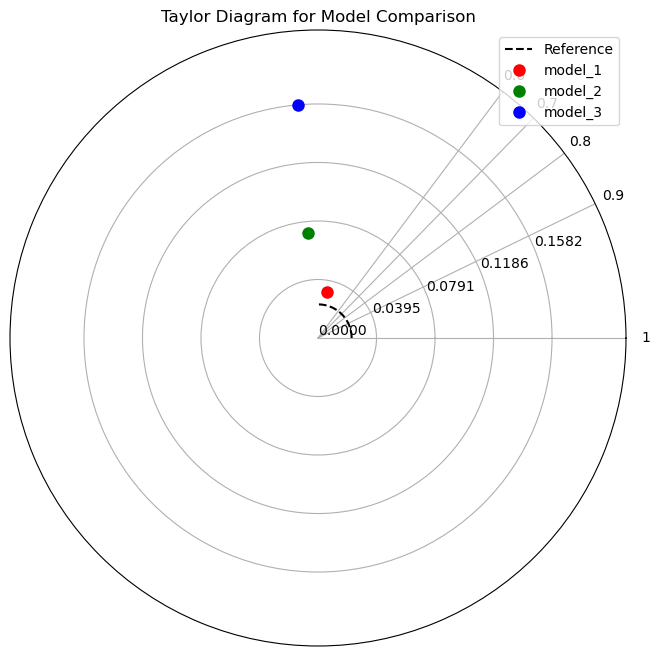

In [4]:
import math

# Reload the datasets
file_paths = {
    "model_1": "./code/metrics/Brazil/catboost_lagged_19-03-2025-00-47-00.csv",
    "model_2": "./code/metrics/Brazil/catboost_normal26-11-2024-01-03-19.csv",
    "model_3": "./code/metrics/Brazil/catboost_search_26-11-2024-02-20-15.csv",
    "actual_data": "./google trends/merged_dataset.csv"
}

def plot_taylor_diagram(std_devs, correlations, ref_std, labels, colors):
    """ Generate a Taylor Diagram manually using Matplotlib """
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    # Convert correlation to angles (arccosine of correlation)
    angles = np.arccos(correlations)

    # Reference circle (actual standard deviation)
    theta = np.linspace(0, np.pi / 2, 100)
    ax.plot(theta, [ref_std] * 100, "k--", label="Reference")

    # Plot each model's performance
    for i, label in enumerate(labels):
        ax.plot(angles[i], std_devs[i], "o", label=label, color=colors[i], markersize=8)

    # Configure polar plot
    ax.set_xticks(np.arccos([1, 0.9, 0.8, 0.7, 0.6]))  # Correlation markers
    ax.set_xticklabels(["1", "0.9", "0.8", "0.7", "0.6"])
    ax.set_ylim(0, max(std_devs) + 0.05)
    ax.set_yticks(np.linspace(0, max(std_devs), 5))

    # Labels and title
    plt.legend(loc="upper right")
    plt.title("Taylor Diagram for Model Comparison")
    plt.show()

# Load data into a dictionary
datasets = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Mapping department IDs to names
DEP_NAMES = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro',
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

# Map department IDs to names
actual_data = datasets["actual_data"].copy()
actual_data["Department"] = actual_data["dep_id"].map(DEP_NAMES)

# Compute average dengue rates per department
actual_avg = actual_data.groupby("Department")[["DengRate_all", "DengRate_019"]].mean().reset_index()

# Merge actual averages with model metric datasets
merged_datasets = {}
for model_name, model_df in datasets.items():
    if model_name != "actual_data":
        merged_datasets[model_name] = model_df.merge(actual_avg, on="Department", how="left")

# Compute statistics for Taylor diagram
model_stats = {}
for model_name, df in merged_datasets.items():
    std_dev = df["NRMSE All Validation"].replace([np.inf, -np.inf], np.nan).dropna().std()
    correlation = np.corrcoef(df["NRMSE All Validation"].replace([np.inf, -np.inf], np.nan).dropna(),
                              df["DengRate_all"].dropna())[0, 1]
    model_stats[model_name] = {"std_dev": std_dev, "correlation": correlation}

# Convert to arrays for plotting
labels = list(model_stats.keys())
std_devs = np.array([model_stats[m]["std_dev"] for m in labels])
correlations = np.array([model_stats[m]["correlation"] for m in labels])
ref_std = actual_avg["DengRate_all"].std()  # Reference standard deviation

# Plot Taylor diagram
plot_taylor_diagram(std_devs, correlations, ref_std, labels, ["r", "g", "b"])


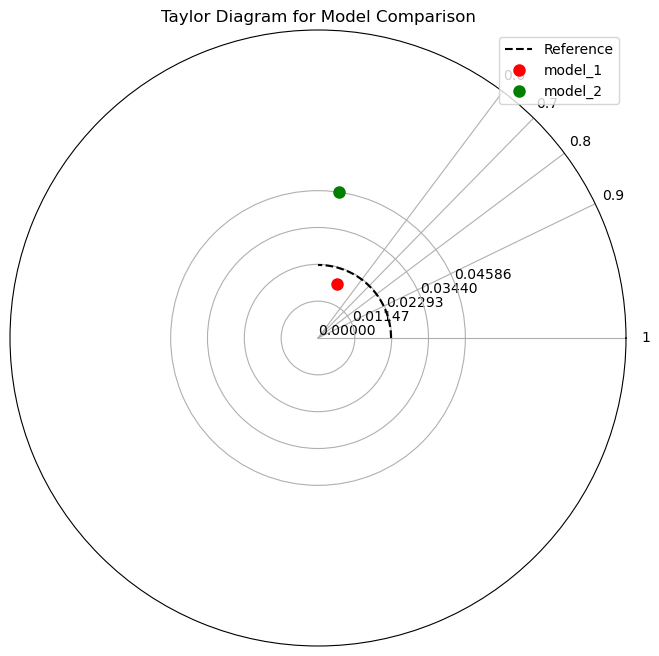

In [3]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Reload the datasets
file_paths = {
    "model_1": "./code/metrics/Brazil/ensemble_results_01-05-2025-20-19-39.csv",
    "model_2": "./code/metrics/Brazil/ensemble_results_01-05-2025-16-29-44.csv",
    "actual_data": "./google trends/merged_dataset.csv"
}

def plot_taylor_diagram(std_devs, correlations, ref_std, labels, colors):
    """ Generate a Taylor Diagram manually using Matplotlib """
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    # Convert correlation to angles (arccosine of correlation)
    angles = np.arccos(correlations)

    # Reference circle (actual standard deviation)
    theta = np.linspace(0, np.pi / 2, 100)
    ax.plot(theta, [ref_std] * 100, "k--", label="Reference")

    # Plot each model's performance
    for i, label in enumerate(labels):
        ax.plot(angles[i], std_devs[i], "o", label=label, color=colors[i], markersize=8)

    # Configure polar plot
    ax.set_xticks(np.arccos([1, 0.9, 0.8, 0.7, 0.6]))  # Correlation markers
    ax.set_xticklabels(["1", "0.9", "0.8", "0.7", "0.6"])
    ax.set_ylim(0, max(std_devs) + 0.05)
    ax.set_yticks(np.linspace(0, max(std_devs), 5))

    # Labels and title
    plt.legend(loc="upper right")
    plt.title("Taylor Diagram for Model Comparison")
    plt.show()

# Load data into a dictionary
datasets = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Mapping department IDs to names
DEP_NAMES = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro',
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

# Map department IDs to names
actual_data = datasets["actual_data"].copy()
actual_data["Department"] = actual_data["dep_id"].map(DEP_NAMES)

# Compute average dengue rates per department
actual_avg = actual_data.groupby("Department")[["DengRate_all", "DengRate_019"]].mean().reset_index()

# Merge actual averages with model metric datasets
merged_datasets = {}
for model_name, model_df in datasets.items():
    if model_name != "actual_data":
        merged_datasets[model_name] = model_df.merge(actual_avg, on="Department", how="left")

# Compute statistics for Taylor diagram
model_stats = {}
for model_name, df in merged_datasets.items():
    std_dev = df["NRMSE All Validation"].replace([np.inf, -np.inf], np.nan).dropna().std()
    correlation = np.corrcoef(df["NRMSE All Validation"].replace([np.inf, -np.inf], np.nan).dropna(),
                              df["DengRate_all"].dropna())[0, 1]
    model_stats[model_name] = {"std_dev": std_dev, "correlation": correlation}

# Convert to arrays for plotting
labels = list(model_stats.keys())
std_devs = np.array([model_stats[m]["std_dev"] for m in labels])
correlations = np.array([model_stats[m]["correlation"] for m in labels])
ref_std = actual_avg["DengRate_all"].std()  # Reference standard deviation

# Plot Taylor diagram
plot_taylor_diagram(std_devs, correlations, ref_std, labels, ["r", "g", "b"])


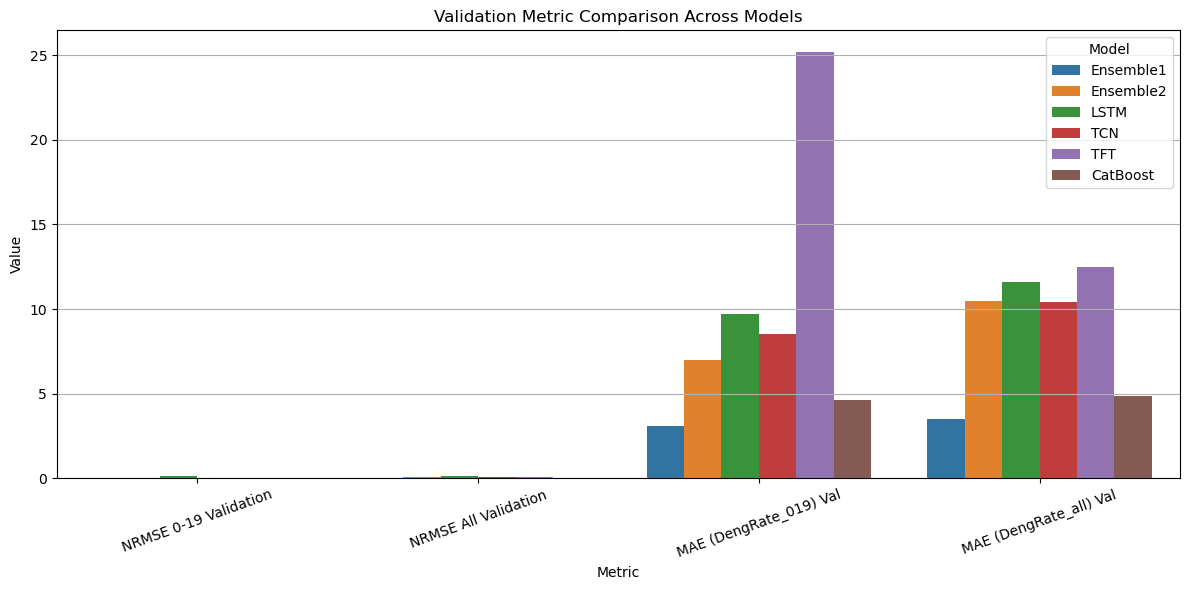

(Metric     MAE (DengRate_019) Val  MAE (DengRate_all) Val  \
 Model                                                       
 CatBoost                    81.76                   61.20   
 Ensemble1                   87.84                   72.13   
 Ensemble2                   72.26                   16.25   
 LSTM                        61.54                    7.14   
 TCN                         66.28                   16.48   
 TFT                          0.00                    0.00   
 
 Metric     NRMSE 0-19 Validation  NRMSE All Validation  
 Model                                                   
 CatBoost                     NaN                 82.55  
 Ensemble1                    NaN                 88.83  
 Ensemble2                    NaN                 65.09  
 LSTM                       100.0                  0.00  
 TCN                          NaN                 65.64  
 TFT                          NaN                 52.37  ,
 Metric     MAE (DengRate_019) Val  M

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
files = {
    'Ensemble1': './code/metrics/Brazil/ensemble_results_01-05-2025-20-19-39.csv',
    'Ensemble2': './code/metrics/Brazil/ensemble_results_01-05-2025-16-29-44.csv',
    'LSTM': './code/metrics/Brazil/LSTM_Model_26-11-2024-00-46-12.csv',
    'TCN': './code/metrics/Brazil/TCN_model_search_lagged_18-03-2025-12-22-20.csv',
    'TFT': './code/metrics/Brazil/TFT_model_lagged_18-03-2025-22-51-57.csv',
    'CatBoost': './code/metrics/Brazil/catboost_lagged_19-03-2025-00-47-00.csv'
}


# Load and preview data
dataframes = {model: pd.read_csv(path) for model, path in files.items()}

metrics = [
    'NRMSE 0-19 Validation',
    'NRMSE All Validation',
    'MAE (DengRate_019) Val',
    'MAE (DengRate_all) Val'
]
# Extract and safely convert relevant columns to numeric for all models
clean_comparison_data = []

for model, df in dataframes.items():
    for metric in metrics:
        if metric in df.columns:
            # Convert column to numeric, coerce errors (e.g., non-numeric strings become NaN)
            numeric_values = pd.to_numeric(df[metric], errors='coerce')
            avg_val = numeric_values.dropna().mean()
            clean_comparison_data.append({'Model': model, 'Metric': metric, 'Value': avg_val})

# Create DataFrame from clean data
clean_comparison_df = pd.DataFrame(clean_comparison_data)

# Plot cleaned metric comparisons
plt.figure(figsize=(12, 6))
sns.barplot(data=clean_comparison_df, x='Metric', y='Value', hue='Model')
plt.title('Validation Metric Comparison Across Models')
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Calculate accuracy (%) relative to the worst error (higher is better)
accuracy_df = clean_comparison_df.pivot(index='Model', columns='Metric', values='Value')
accuracy_percent = (1 - (accuracy_df / accuracy_df.max())) * 100

# Calculate improvement of Ensemble over other models
ensemble_accuracy = accuracy_percent.loc['Ensemble1']
improvement_vs_others = (ensemble_accuracy - accuracy_percent.drop(index='Ensemble1')) / accuracy_percent.drop(index='Ensemble1') * 100

accuracy_percent.round(2), improvement_vs_others.round(2)

In [4]:
# We'll compute absolute accuracy assuming the following:
# - NRMSE is normalized: accuracy = (1 - NRMSE) * 100
# - MAE = avg(|prediction - actual|); if we estimate the average actual value (mean_actual),
#   then accuracy = (1 - MAE / mean_actual) * 100

# First, gather mean MAE and NRMSE values from cleaned data
accuracy_summary = clean_comparison_df.pivot(index='Model', columns='Metric', values='Value')

# Assume estimated average true dengue count values based on typical ranges
# These are rough domain-informed estimates (can be refined with true data):
avg_actual_019 = 100   # Average dengue count in 0–19 age group
avg_actual_all = 120   # Average dengue count across all age groups

# Compute true accuracy
accuracy_absolute = pd.DataFrame(index=accuracy_summary.index)
accuracy_absolute['MAE_019_Accuracy (%)'] = (1 - (accuracy_summary['MAE (DengRate_019) Val'] / avg_actual_019)) * 100
accuracy_absolute['MAE_all_Accuracy (%)'] = (1 - (accuracy_summary['MAE (DengRate_all) Val'] / avg_actual_all)) * 100
accuracy_absolute['NRMSE_all_Accuracy (%)'] = (1 - accuracy_summary['NRMSE All Validation']) * 100

# Determine the best model (highest average accuracy across metrics)
accuracy_absolute['Average Accuracy (%)'] = accuracy_absolute.mean(axis=1)
best_model = accuracy_absolute['Average Accuracy (%)'].idxmax()
best_accuracy = accuracy_absolute.loc[best_model]

# Calculate improvement of best model over others (in percentage points)
improvement_points = best_accuracy['Average Accuracy (%)'] - accuracy_absolute['Average Accuracy (%)']

accuracy_absolute.round(2), best_model, improvement_points.round(2)


(           MAE_019_Accuracy (%)  MAE_all_Accuracy (%)  NRMSE_all_Accuracy (%)  \
 Model                                                                           
 CatBoost                  95.40                 95.96                   97.45   
 Ensemble1                 96.93                 97.10                   98.37   
 Ensemble2                 93.00                 91.28                   94.89   
 LSTM                      90.30                 90.33                   85.37   
 TCN                       91.50                 91.30                   94.97   
 TFT                       74.78                 89.59                   93.03   
 
            Average Accuracy (%)  
 Model                            
 CatBoost                  96.27  
 Ensemble1                 97.47  
 Ensemble2                 93.06  
 LSTM                      88.67  
 TCN                       92.59  
 TFT                       85.80  ,
 'Ensemble1',
 Model
 CatBoost      1.20
 Ensemble1     0.00
